In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dados = pd.read_csv('houses_to_rent_v2.csv')
dados

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [5]:
dados.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [6]:
dados['city'].unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

In [7]:
dados.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [8]:
tipos = dados.dtypes
tipos

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [18]:
dados['animal'].value_counts().reset_index()


,animal,count
0,acept,8316
1,not acept,2376


In [35]:
dados_cidade = dados['city'].value_counts()
dados_cidade

city
São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: count, dtype: int64

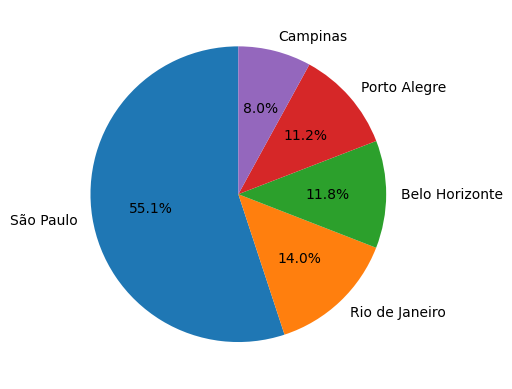

In [37]:
plt.pie(dados_cidade, labels=dados_cidade.index, autopct='%1.1f%%', startangle=90)
plt.show()

In [53]:
dados_media_total = dados[['total (R$)', 'city']].groupby('city').mean()
dados_media_total

,total (R$)
city,
Belo Horizonte,6315.242448
Campinas,3173.276671
Porto Alegre,2989.782900
Rio de Janeiro,4611.684877
São Paulo,6380.831833


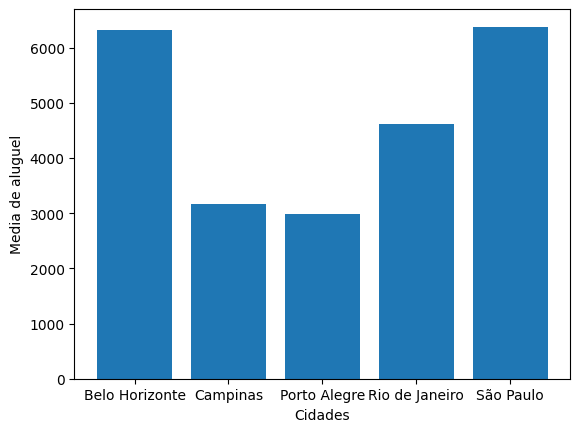

In [54]:
plt.bar(dados_media_total.index, dados_media_total['total (R$)'])
plt.xlabel('Cidades')
plt.ylabel('Media de aluguel')
plt.show()

In [62]:
dados['floor'].value_counts()

floor
-      2461
1      1081
2       985
3       931
4       748
5       600
6       539
7       497
8       490
9       369
10      357
11      303
12      257
13      200
14      170
15      147
16      109
17       96
18       75
19       53
20       44
21       42
25       25
23       25
22       24
26       20
24       19
27        8
28        6
29        5
32        2
35        1
46        1
301       1
51        1
Name: count, dtype: int64

In [60]:
dados[dados['floor'] == '-']

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
15,Campinas,330,4,6,6,-,acept,furnished,680,8000,328,121,9129
19,São Paulo,600,4,5,6,-,acept,not furnished,0,12000,9500,181,21680
20,São Paulo,100,7,4,0,-,acept,not furnished,0,3800,118,58,3976
23,São Paulo,35,1,1,0,-,acept,not furnished,0,1100,3,14,1117
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10659,Campinas,150,3,2,4,-,acept,furnished,0,3500,186,53,3739
10661,Campinas,250,1,2,2,-,acept,not furnished,0,2200,602,34,2836
10668,São Paulo,24,1,1,0,-,acept,not furnished,0,870,0,14,884
10674,Rio de Janeiro,135,4,2,1,-,acept,not furnished,0,3300,115,51,3466


In [65]:
dados_funiture = dados['furniture'].value_counts()
dados_funiture

furniture
not furnished    8086
furnished        2606
Name: count, dtype: int64

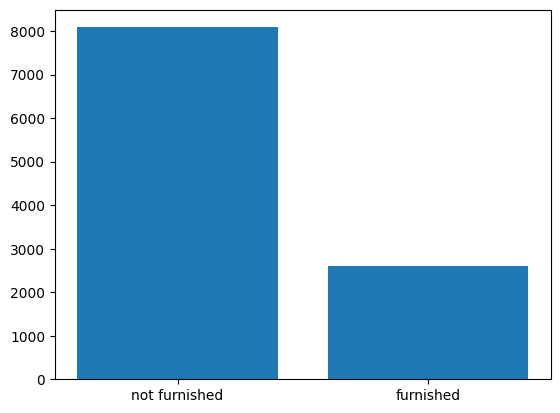

In [66]:
plt.bar(dados_funiture.index, dados_funiture.values)
plt.show()

In [73]:
furniture_city = dados[['city', 'furniture']].groupby('city').value_counts()
furniture_city

city            furniture    
Belo Horizonte  not furnished    1081
                furnished         177
Campinas        not furnished     742
                furnished         111
Porto Alegre    not furnished     874
                furnished         319
Rio de Janeiro  not furnished    1095
                furnished         406
São Paulo       not furnished    4294
                furnished        1593
Name: count, dtype: int64

In [67]:
animal = dados['animal'].value_counts()
animal

animal
acept        8316
not acept    2376
Name: count, dtype: int64

In [75]:
animal_city = dados[['animal', 'city']].groupby('city').value_counts()
animal_city

city            animal   
Belo Horizonte  acept         931
                not acept     327
Campinas        acept         693
                not acept     160
Porto Alegre    acept        1005
                not acept     188
Rio de Janeiro  acept        1205
                not acept     296
São Paulo       acept        4482
                not acept    1405
Name: count, dtype: int64

In [20]:
dados.groupby('city')['animal'].value_counts().reset_index()

,city,animal,count
0,Belo Horizonte,acept,931
1,Belo Horizonte,not acept,327
2,Campinas,acept,693
3,Campinas,not acept,160
4,Porto Alegre,acept,1005
5,Porto Alegre,not acept,188
6,Rio de Janeiro,acept,1205
7,Rio de Janeiro,not acept,296
8,São Paulo,acept,4482
9,São Paulo,not acept,1405
